In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import fft
import math

In [5]:
def myplot(x=None,y=None,marker="",color="",label=' ',linestyle="-",):
    if y is None:
        if color != "":
            plt.plot(x,color=color,label=label,marker=marker,linestyle=linestyle)
        else:
            plt.plot(x,label=label,marker=marker,linestyle=linestyle)
    else:
        if color != "":
            plt.plot(x,y,color=color,label=label,marker=marker,linestyle=linestyle)
        else:
            plt.plot(x,y,label=label,marker=marker,linestyle=linestyle)
        
def showplot(title="",xlabel="",ylabel="",size=(10,4)):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.gcf().set_size_inches(size[0], size[1])
    plt.show()

In [3]:
datapoints = 100
sampling_rate = 100
df = sampling_rate / datapoints

n1 = 0
n2 = 10
n = datapoints

# build matrix
M_Re = np.array([[(1/n*math.e**(-1j*i*k*2*math.pi/n)).real for k in range(n)] for i in range(n1,n2+1)])
M_Im = np.array([[(1/n*math.e**(-1j*i*k*2*math.pi/n)).imag for k in range(n)] for i in range(n1,n2+1)])

# M_Re = np.array([[(1/np.sqrt(n)*math.e**(-1j*i*k*2*math.pi/n)).real for k in range(n)] for i in range(n1,n2+1)])
# M_Im = np.array([[(1/np.sqrt(n)*math.e**(-1j*i*k*2*math.pi/n)).imag for k in range(n)] for i in range(n1,n2+1)])


M_dct = np.array([[1/n*math.cos(math.pi*i*(2*k+1)/(2*n)) for k in range(n)] for i in range(2*n1,2*n2+1)])

x = np.array([2*math.pi*x/sampling_rate for x in range(datapoints)])
xf = np.arange(n1,n2+1) * df
xf_dct = np.arange(2*n1,2*n2+1)

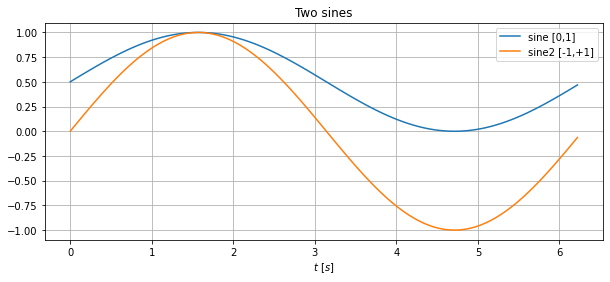

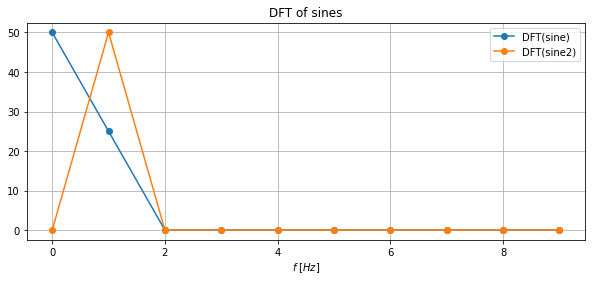

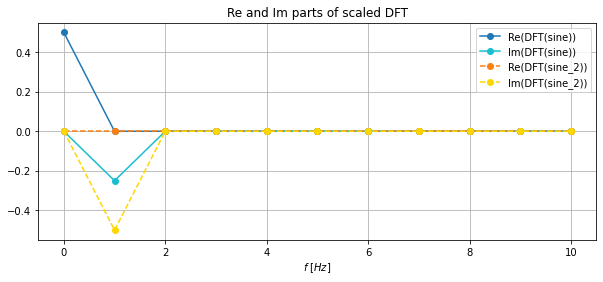

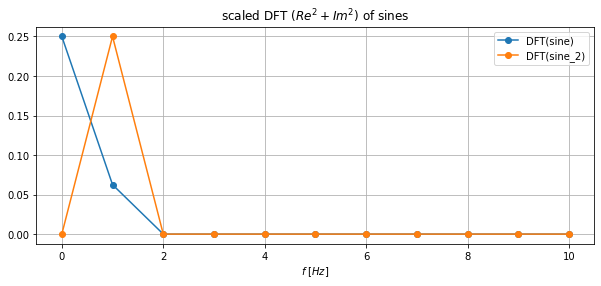

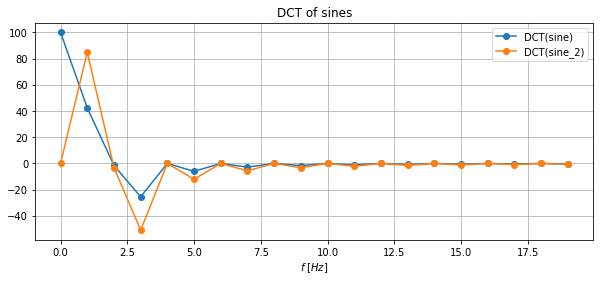

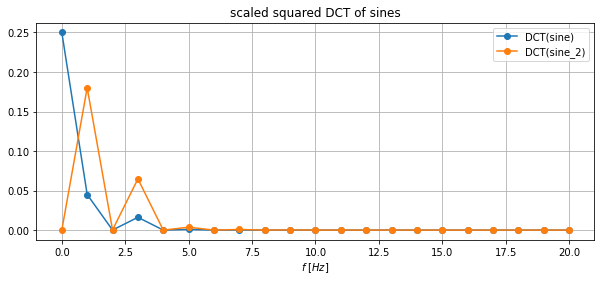

In [4]:
# SINE

# signal init
sine = np.sin(x)
sine -= np.min(sine)
sine /= np.max(sine)

sine_2 = sine * 2 - 1

# plain signal
myplot(x,sine,label="sine [0,1]")
myplot(x,sine_2, label="sine2 [-1,+1]")
showplot(title="Two sines", xlabel="$t\ [s]$")

# original DFT
dft = np.abs(np.fft.rfft(sine))
dft_2 = np.abs(np.fft.rfft(sine_2))

N = 10
myplot(xf[:N],dft[:N], marker="o", label="DFT(sine)")
myplot(xf[:N],dft_2[:N], marker="o", label="DFT(sine2)")
showplot(title="DFT of sines", xlabel="$f\ [Hz]$")

# matrix vector mult
dft_Re = M_Re.dot(sine)
dft_Im = M_Im.dot(sine)
dft_Re2 = M_Re.dot(sine_2)
dft_Im2 = M_Im.dot(sine_2)

# plot: Re & Im
myplot(xf, dft_Re, marker="o", label="Re(DFT(sine))")
myplot(xf, dft_Im, marker="o", label="Im(DFT(sine))", color="tab:cyan")
myplot(xf, dft_Re2, marker="o", linestyle="--", label="Re(DFT(sine_2))")
myplot(xf, dft_Im2, marker="o", linestyle="--", label="Im(DFT(sine_2))", color="gold")
showplot(title="Re and Im parts of scaled DFT", xlabel="$f\ [Hz]$")

# putting Re and Im together
mydft = dft_Re**2 + dft_Im**2
mydft2 = dft_Re2**2 + dft_Im2**2

# plot DFT
myplot(xf, mydft, marker="o", label="DFT(sine)")
myplot(xf, mydft2, marker="o", label="DFT(sine_2)")
showplot(title="scaled DFT ($Re^2 + Im^2$) of sines", xlabel="$f\ [Hz]$")

# original DCT
dct = fft.dct(sine, type=2)
dct_2 = fft.dct(sine_2, type=2)

myplot(xf_dct[:2*N], dct[:2*N], marker="o", label="DCT(sine)")
myplot(xf_dct[:2*N], dct_2[:2*N], marker="o", label="DCT(sine_2)")
showplot(title="DCT of sines", xlabel="$f\ [Hz]$")

mydct = M_dct.dot(sine)**2
mydct_2 = M_dct.dot(sine_2)**2

myplot(xf_dct, mydct, marker="o", label="DCT(sine)")
myplot(xf_dct, mydct_2, marker="o", label="DCT(sine_2)")
showplot(title="scaled squared DCT of sines", xlabel="$f\ [Hz]$")

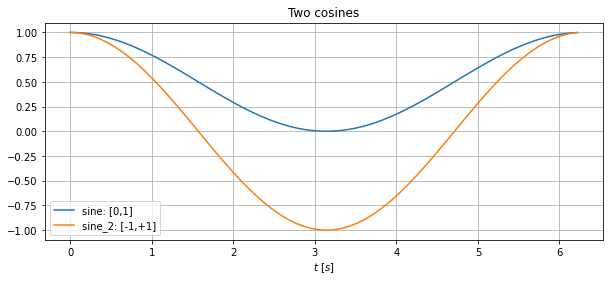

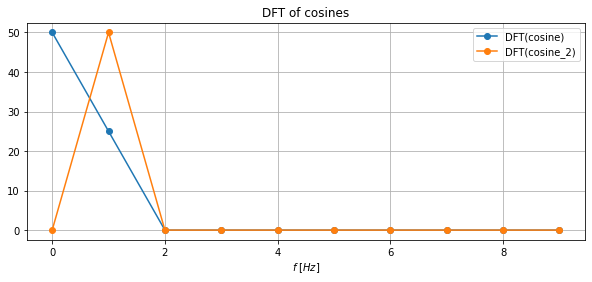

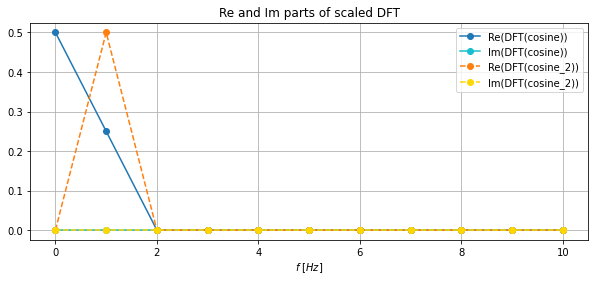

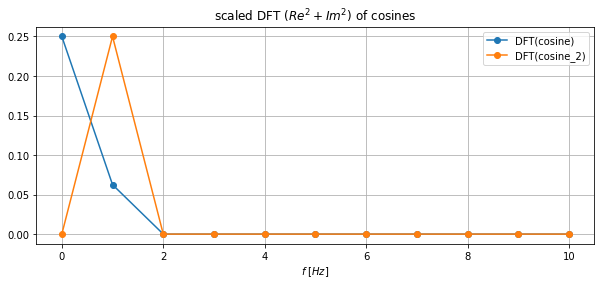

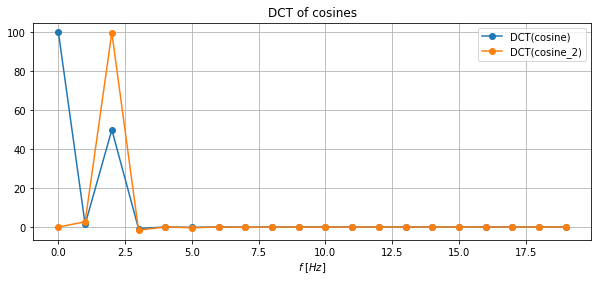

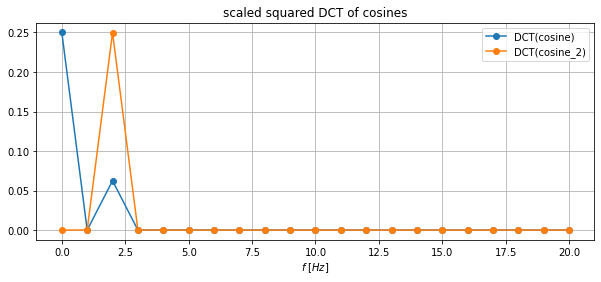

In [5]:
# COSINE
cosine = np.cos(x)
cosine -= np.min(cosine)
cosine /= np.max(cosine)

cosine_2 = cosine * 2 - 1

# plain signal
myplot(x,cosine, label="sine: [0,1]")
myplot(x,cosine_2, label="sine_2: [-1,+1]")
showplot(title="Two cosines", xlabel="$t\ [s]$")

# original DFT
dft = np.abs(np.fft.rfft(cosine))
dft_2 = np.abs(np.fft.rfft(cosine_2))

N = 10
myplot(xf[:N], dft[:N], marker="o", label="DFT(cosine)")
myplot(xf[:N], dft_2[:N], marker="o", label="DFT(cosine_2)")
showplot(title="DFT of cosines", xlabel="$f\ [Hz]$")

# matrix vector mult
dft_Re = M_Re.dot(cosine)
dft_Im = M_Im.dot(cosine)
dft_Re2 = M_Re.dot(cosine_2)
dft_Im2 = M_Im.dot(cosine_2)

# plot: Re & Im
myplot(xf, dft_Re, marker="o", label="Re(DFT(cosine))")
myplot(xf, dft_Im, marker="o", label="Im(DFT(cosine))", color="tab:cyan")
myplot(xf, dft_Re2, marker="o", linestyle="--", label="Re(DFT(cosine_2))")
myplot(xf, dft_Im2, marker="o", linestyle="--", label="Im(DFT(cosine_2))", color="gold")
showplot(title="Re and Im parts of scaled DFT", xlabel="$f\ [Hz]$")

# putting Re and Im together
mydft = dft_Re**2 + dft_Im**2
mydft2 = dft_Re2**2 + dft_Im2**2

# plot DFT
myplot(xf, mydft, marker="o", label="DFT(cosine)")
myplot(xf, mydft2, marker="o", label="DFT(cosine_2)")
showplot(title="scaled DFT ($Re^2 + Im^2$) of cosines", xlabel="$f\ [Hz]$")

# original DCT
dct = fft.dct(cosine, type=2)
dct_2 = fft.dct(cosine_2, type=2)

myplot(xf_dct[:2*N], dct[:2*N], marker="o", label="DCT(cosine)")
myplot(xf_dct[:2*N], dct_2[:2*N], marker="o", label="DCT(cosine_2)")
showplot(title="DCT of cosines", xlabel="$f\ [Hz]$")

mydct = M_dct.dot(cosine)**2
mydct_2 = M_dct.dot(cosine_2)**2
myplot(xf_dct, mydct, marker="o", label="DCT(cosine)")
myplot(xf_dct, mydct_2, marker="o", label="DCT(cosine_2)")
showplot(title="scaled squared DCT of cosines", xlabel="$f\ [Hz]$")

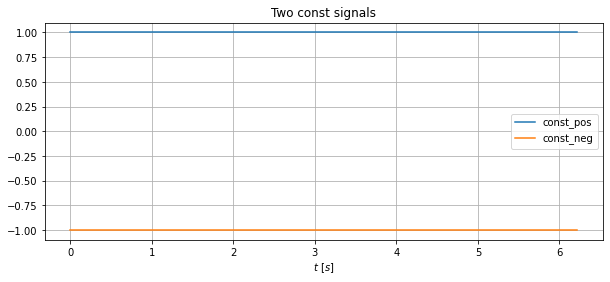

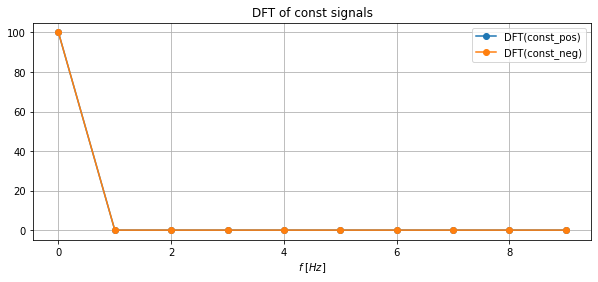

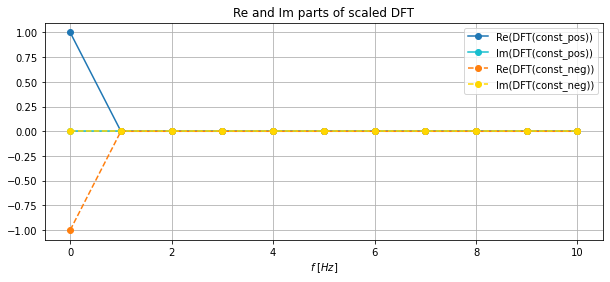

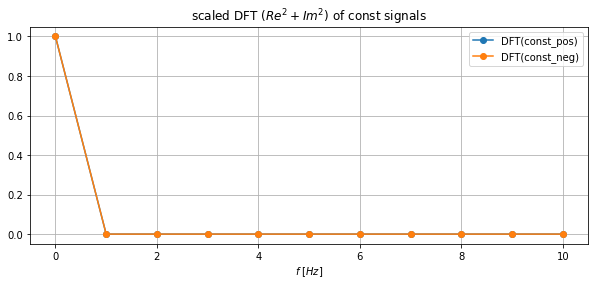

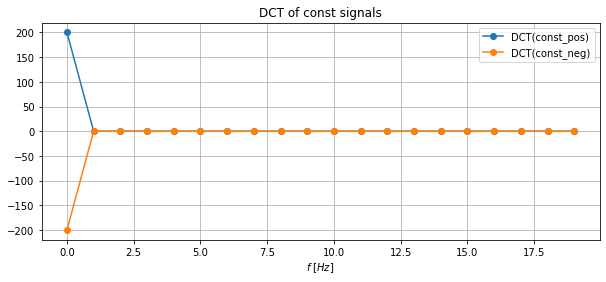

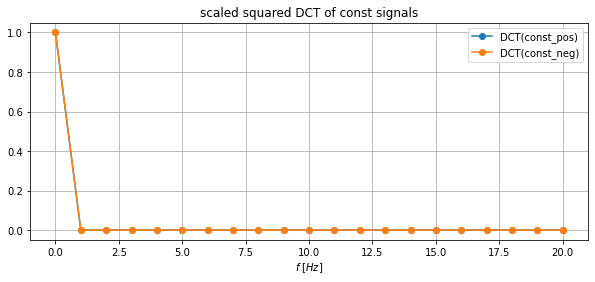

In [6]:
# CONST

const_pos = np.array([1]*datapoints)
const_neg = np.array([-1]*datapoints)

# plain signal
myplot(x,const_pos, label="const_pos")
myplot(x,const_neg, label="const_neg")
showplot(title="Two const signals", xlabel="$t\ [s]$")

# original DFT
dft = np.abs(np.fft.rfft(const_pos))
dft_2 = np.abs(np.fft.rfft(const_neg))

N = 10
myplot(dft[:N], marker="o", label="DFT(const_pos)")
myplot(dft_2[:N], marker="o", label="DFT(const_neg)")
showplot(title="DFT of const signals", xlabel="$f\ [Hz]$")

# matrix vector mult
dft_Re = M_Re.dot(const_pos)
dft_Im = M_Im.dot(const_pos)
dft_Re2 = M_Re.dot(const_neg)
dft_Im2 = M_Im.dot(const_neg)

# plot: Re & Im
myplot(dft_Re, marker="o", label="Re(DFT(const_pos))")
myplot(dft_Im, marker="o", label="Im(DFT(const_pos))", color="tab:cyan")
myplot(dft_Re2, marker="o", linestyle="--", label="Re(DFT(const_neg))")
myplot(dft_Im2, marker="o", linestyle="--", label="Im(DFT(const_neg))", color="gold")
showplot(title="Re and Im parts of scaled DFT", xlabel="$f\ [Hz]$")

# putting Re and Im together
mydft = dft_Re**2 + dft_Im**2
mydft2 = dft_Re2**2 + dft_Im2**2

# plot DFT
myplot(mydft, marker="o", label="DFT(const_pos)")
myplot(mydft2, marker="o", label="DFT(const_neg)")
showplot(title="scaled DFT ($Re^2 + Im^2$) of const signals", xlabel="$f\ [Hz]$")

# original DCT
dct = fft.dct(const_pos, type=2)
dct_2 = fft.dct(const_neg, type=2)

myplot(dct[:2*N], marker="o", label="DCT(const_pos)")
myplot(dct_2[:2*N], marker="o", label="DCT(const_neg)")
showplot(title="DCT of const signals", xlabel="$f\ [Hz]$")

mydct = M_dct.dot(const_pos)**2
mydct_2 = M_dct.dot(const_neg)**2
myplot(mydct, marker="o", label="DCT(const_pos)")
myplot(mydct_2, marker="o", label="DCT(const_neg)")
showplot(title="scaled squared DCT of const signals", xlabel="$f\ [Hz]$")

In [3]:
# Real Data
import pandas as pd

df_hammer = pd.read_csv('./sensitive_data/data_dft_analysis.csv', encoding='utf-8', sep=';', decimal=",", dtype={'t':np.float64, 'p1':np.float64, 'p2':np.float64})

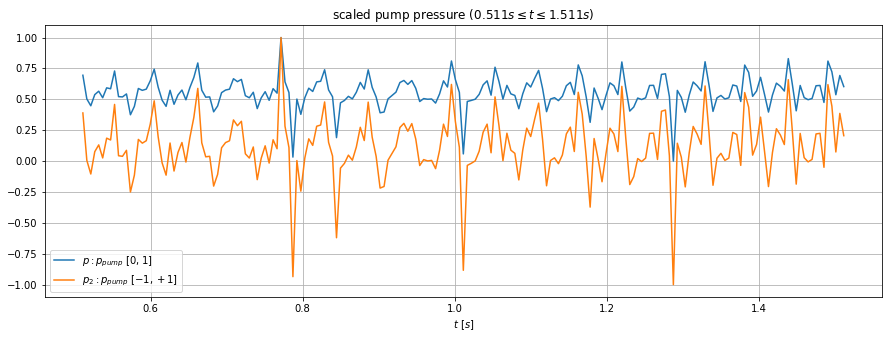

values: 193
sampling rate: 192.00
df = 0.995


In [6]:
t = df_hammer['t'].to_numpy()
dT = max(t) - min(t)
f_samp = len(t) / dT

downsampling = 100
n_cut = int((dT % 1) * f_samp)

p = df_hammer['p_pump'].to_numpy()[n_cut:n_cut + 1 + int(f_samp):downsampling]
p -= min(p)
p /= max(p)

p2 = p.copy()
p2 = p2 * 2 - 1

xt = t[n_cut:n_cut + 1 + int(f_samp):downsampling]

myplot(xt, p, label="$p: p_{pump}\ [0,1]$")
myplot(xt, p2, label="$p_2: p_{pump}\ [-1,+1]$")
showplot(title=f"scaled pump pressure (${min(xt):.3f}s\leq t\leq {max(xt):.3f}s$)", xlabel="$t\ [s]$", size=(15,5))

print(f"values: {len(p)}")
print(f"sampling rate: {f_samp / downsampling:.2f}")

df_p = f_samp / downsampling / len(p)
print(f"df = {df_p:.3f}")

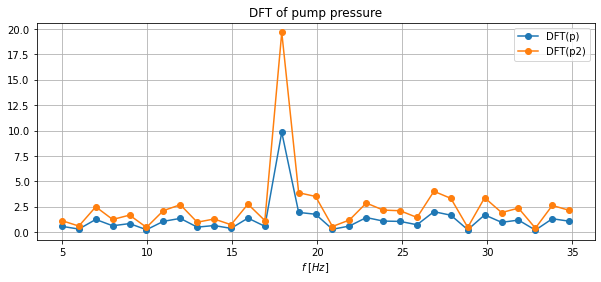

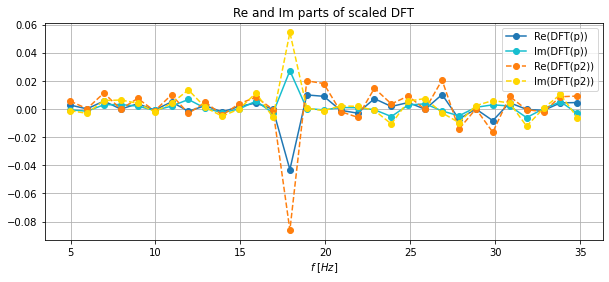

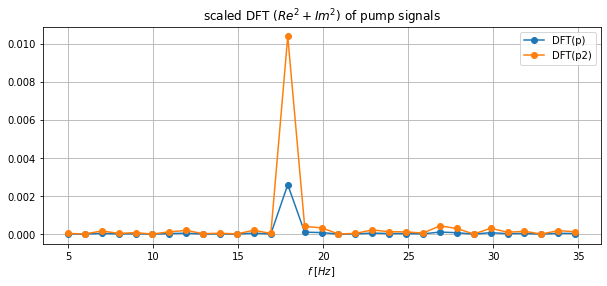

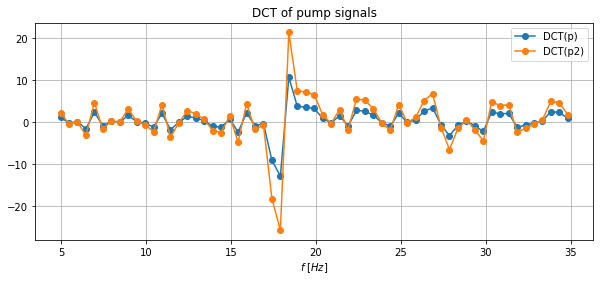

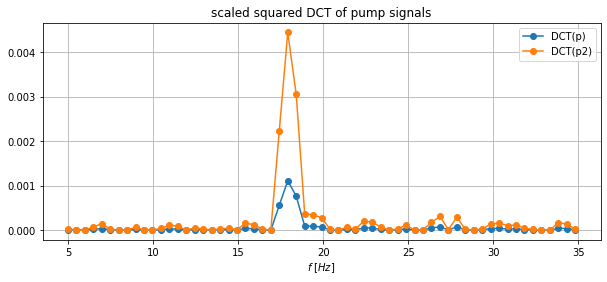

In [7]:
# rebuild matrix
n1 = 5
n2 = 35
n = len(p)

xf = np.arange(n1,n2+1) * df_p
xf_dct = np.arange(2*n1,2*n2+1) * df_p / 2

# build matrix
M_Re = np.array([[(1/n*math.e**(-1j*i*k*2*math.pi/n)).real for k in range(n)] for i in range(n1,n2+1)])
M_Im = np.array([[(1/n*math.e**(-1j*i*k*2*math.pi/n)).imag for k in range(n)] for i in range(n1,n2+1)])

# M_Re = np.array([[(1/np.sqrt(n)*math.e**(-1j*i*k*2*math.pi/n)).real for k in range(n)] for i in range(n1,n2+1)])
# M_Im = np.array([[(1/np.sqrt(n)*math.e**(-1j*i*k*2*math.pi/n)).imag for k in range(n)] for i in range(n1,n2+1)])
M_dct = np.array([[1/n*math.cos(math.pi*i*(2*k+1)/(2*n)) for k in range(n)] for i in range(2*n1,2*n2+1)])


# original DFT
dft = np.abs(np.fft.rfft(p))
dft_2 = np.abs(np.fft.rfft(p2))

myplot(xf, dft[n1:n2+1], "o", label="DFT(p)")
myplot(xf, dft_2[n1:n2+1], "o", label="DFT(p2)")
showplot(title="DFT of pump pressure", xlabel="$f\ [Hz]$")

# matrix vector mult
dft_Re = M_Re.dot(p)
dft_Im = M_Im.dot(p)
dft_Re2 = M_Re.dot(p2)
dft_Im2 = M_Im.dot(p2)

# plot: Re & Im
myplot(xf, dft_Re, "o", label="Re(DFT(p))")
myplot(xf, dft_Im, "o", label="Im(DFT(p))", color="tab:cyan")
myplot(xf, dft_Re2, "o", linestyle="--", label="Re(DFT(p2))")
myplot(xf, dft_Im2, "o", linestyle="--", label="Im(DFT(p2))", color="gold")
showplot(title="Re and Im parts of scaled DFT", xlabel="$f\ [Hz]$")

# putting Re and Im together
mydft = dft_Re**2 + dft_Im**2
mydft2 = dft_Re2**2 + dft_Im2**2

# plot DFT
myplot(xf, mydft, "o", label="DFT(p)")
myplot(xf, mydft2, "o", label="DFT(p2)")
showplot(title="scaled DFT ($Re^2 + Im^2$) of pump signals", xlabel="$f\ [Hz]$")


# original DCT
dct = fft.dct(p, type=2)
dct_2 = fft.dct(p2, type=2)

myplot(xf_dct, dct[2*n1:2*n2+1], "o", label="DCT(p)")
myplot(xf_dct, dct_2[2*n1:2*n2+1], "o", label="DCT(p2)")
showplot(title="DCT of pump signals", xlabel="$f\ [Hz]$")

mydct = M_dct.dot(p)**2
mydct_2 = M_dct.dot(p2)**2
myplot(xf_dct, mydct, "o", label="DCT(p)")
myplot(xf_dct, mydct_2, "o", label="DCT(p2)")
showplot(title="scaled squared DCT of pump signals", xlabel="$f\ [Hz]$")